 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [9]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"].dtype
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.head()






/Users/patrickthornquist/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
# Calculate Daily Returns
sp500_history["Close"] = sp500_history["Close"].pct_change()
sp500_history.head()


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_history = sp500_history.dropna()
sp500_history.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history = sp500_history.rename(columns={
    "Close": "SP500_Daily_Returns"
})

sp500_history.head()

,SP500_Daily_Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_daily_returns = pd.concat([whale_returns, algo_returns, sp500_history], axis="columns", join="inner")
joined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date', ylabel='% Change'>

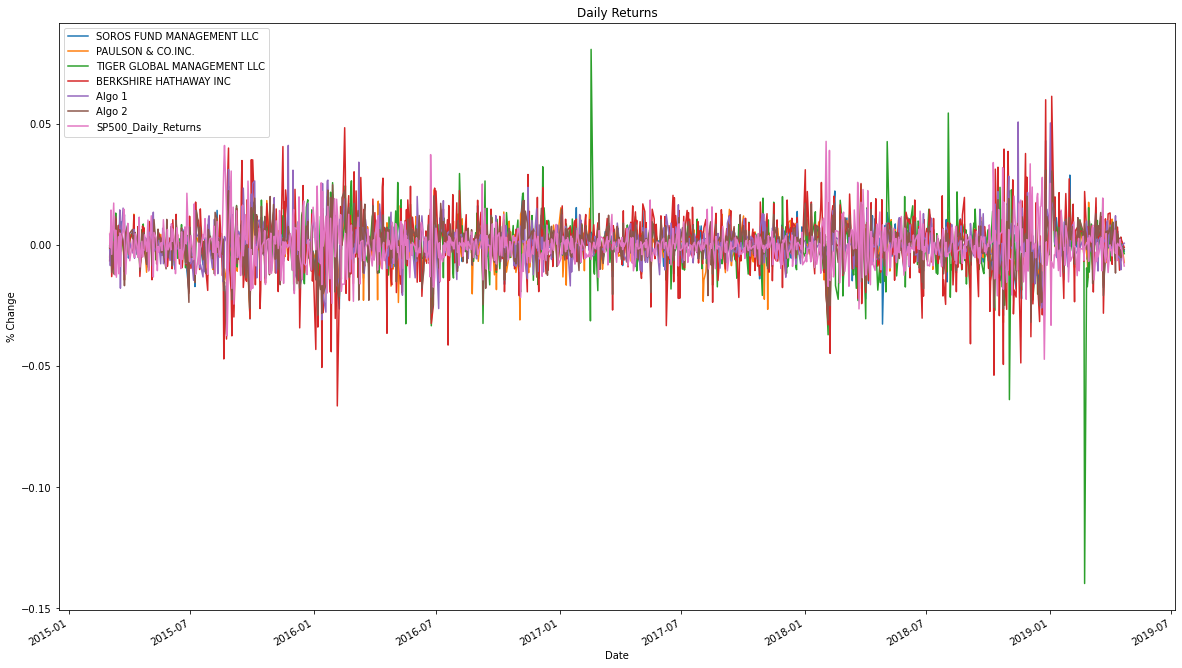

In [15]:
# Plot daily returns of all portfolios
joined_daily_returns.plot(figsize = (20,12), title="Daily Returns", ylabel="% Change")

#### Calculate and Plot cumulative returns.

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_daily_returns).cumprod()
cumulative_returns.head()


# Plot cumulative returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date', ylabel='% Change'>

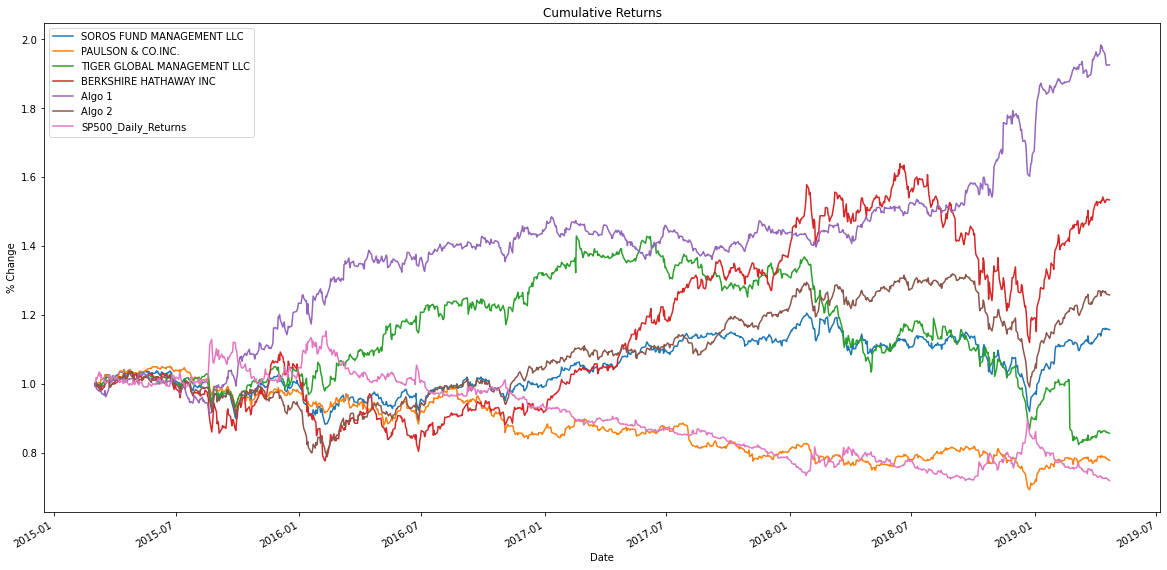

In [17]:
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns", ylabel="% Change")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box plot for each portfolio'}, ylabel='% Change'>

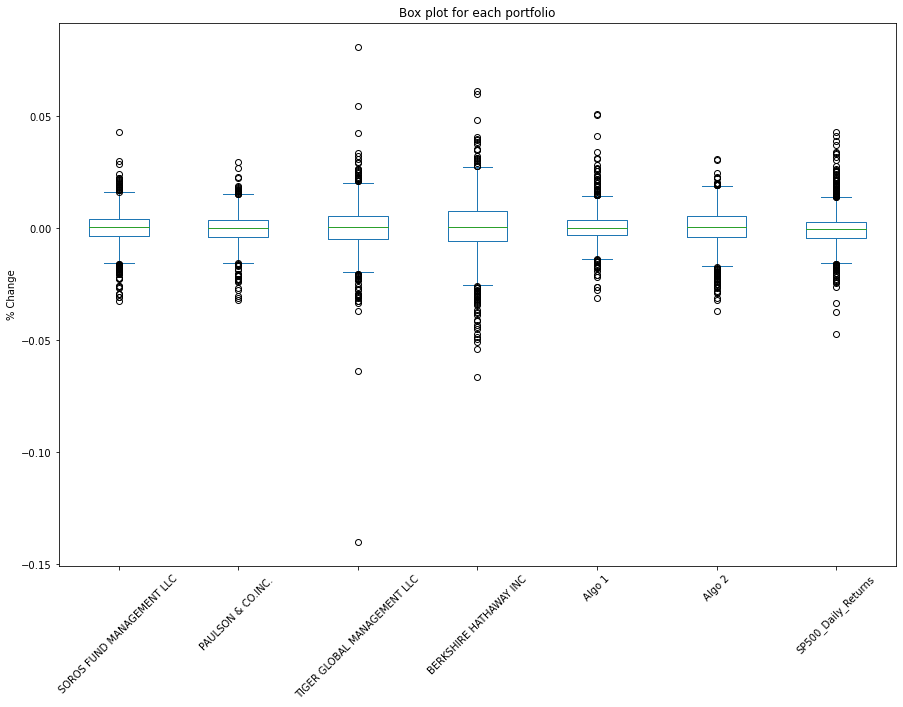

In [18]:
# Box plot to visually show risk
joined_daily_returns.plot.box(figsize=(15,10), rot=45, title="Box plot for each portfolio", ylabel="% Change")
# algo_returns.plot.box(figsize=(15,10))
# sp500_history.plot.box(figsize=(15,10))

### Calculate Standard Deviations

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_whale_std = whale_returns.std()
daily_algo_std = algo_returns.std()

In [20]:
sp500_std = joined_daily_returns['SP500_Daily_Returns'].std()

In [21]:
joined_daily_returns.std() > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500_Daily_Returns            False
dtype: bool

## Analysis Note:
- Berkshire Hathaway Inc and Tiger Global Management LLC are riskier than the S&P 500

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_daily_returns.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500_Daily_Returns            0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date'>

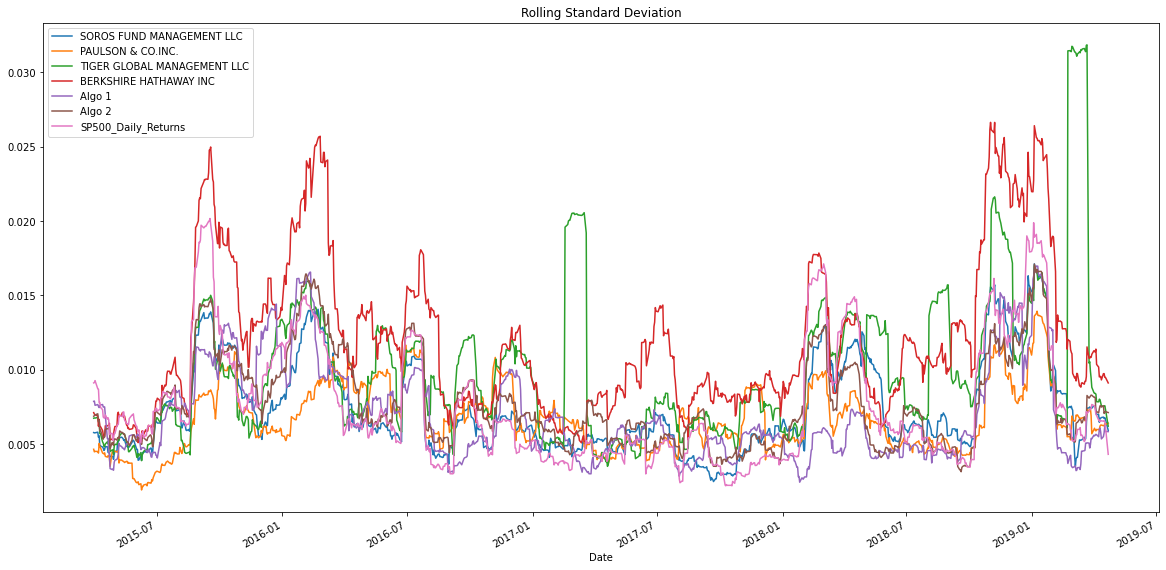

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

joined_daily_returns.rolling(window=21).std().plot(figsize=(20,10), title="Rolling Standard Deviation")


# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

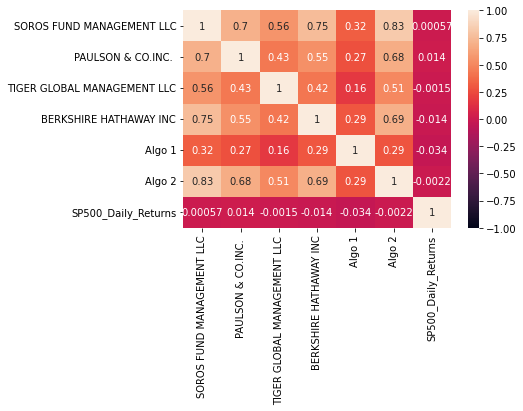

In [24]:
# Calculate the correlation

correlation = joined_daily_returns.corr()

# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

In [25]:
correlation.style.background_gradient(cmap="rainbow")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500_Daily_Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

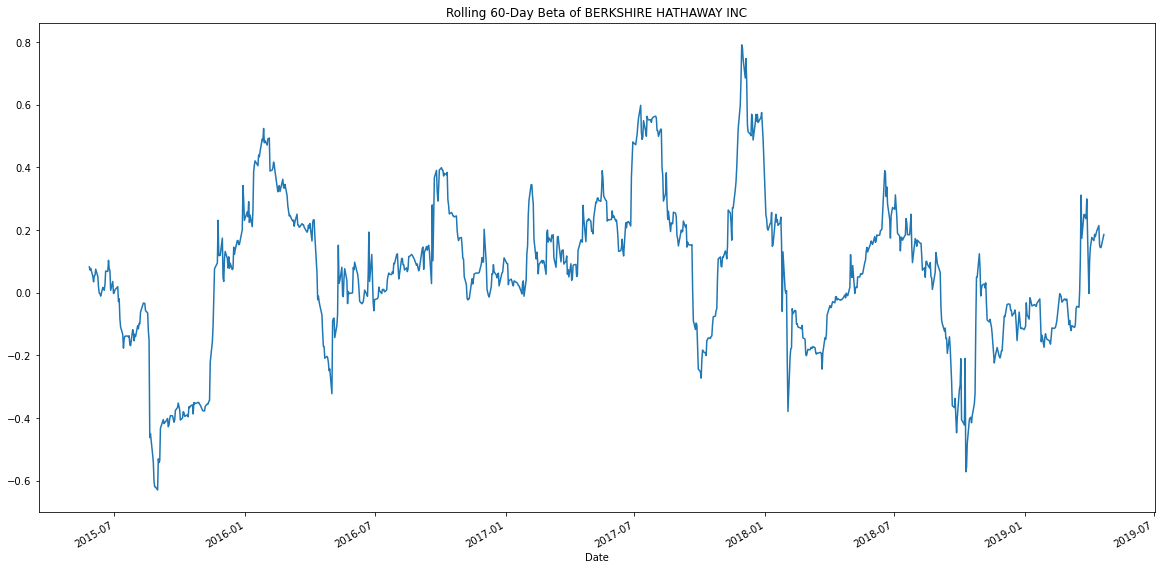

In [26]:
# Calculate covariance of a single portfolio

covariance = joined_daily_returns["BERKSHIRE HATHAWAY INC"].cov(joined_daily_returns["SP500_Daily_Returns"])
covariance

# Calculate variance of S&P 500

variance = joined_daily_returns["SP500_Daily_Returns"].var()
variance

# Computing beta

berkshire_returns_beta = covariance / variance
berkshire_returns_beta

# Plot beta trend
rolling_covariance = joined_daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(joined_daily_returns["SP500_Daily_Returns"])
rolling_variance = joined_daily_returns["SP500_Daily_Returns"].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [27]:
# Use `ewm` to calculate the rolling window

ewm_covariance = joined_daily_returns["BERKSHIRE HATHAWAY INC"].ewm(halflife=21).mean()
ewm_variance = joined_daily_returns["SP500_Daily_Returns"].ewm(halflife=21).mean()



<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

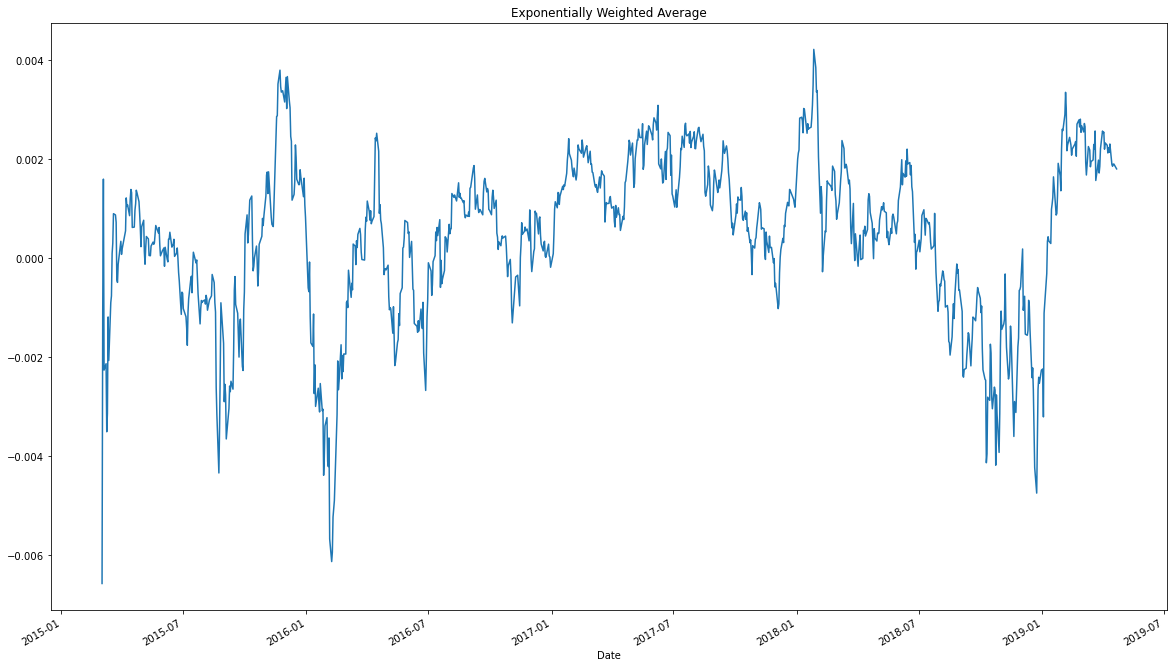

In [28]:
ewm_covariance.plot(figsize=(20,12), title="Exponentially Weighted Average")

<AxesSubplot:xlabel='Date'>

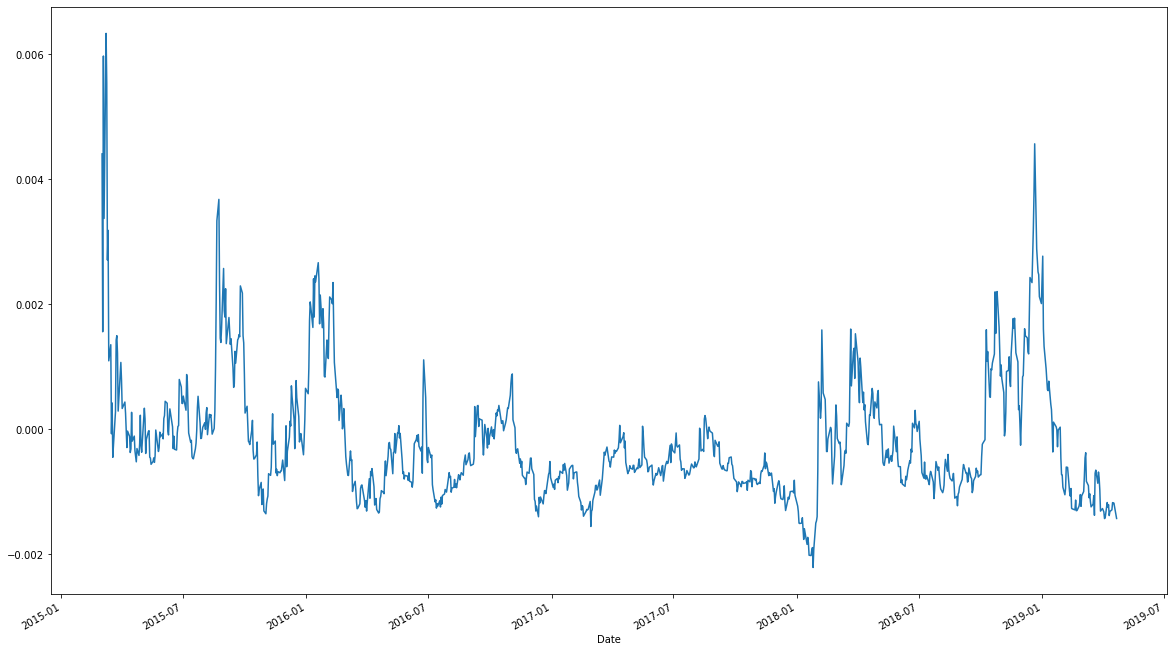

In [29]:
ewm_variance.plot(figsize=(20,12))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
annual_sharpe_ratios = ((joined_daily_returns.mean()-0) * 252) / (joined_daily_returns.std() * np.sqrt(252))
annual_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500_Daily_Returns           -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

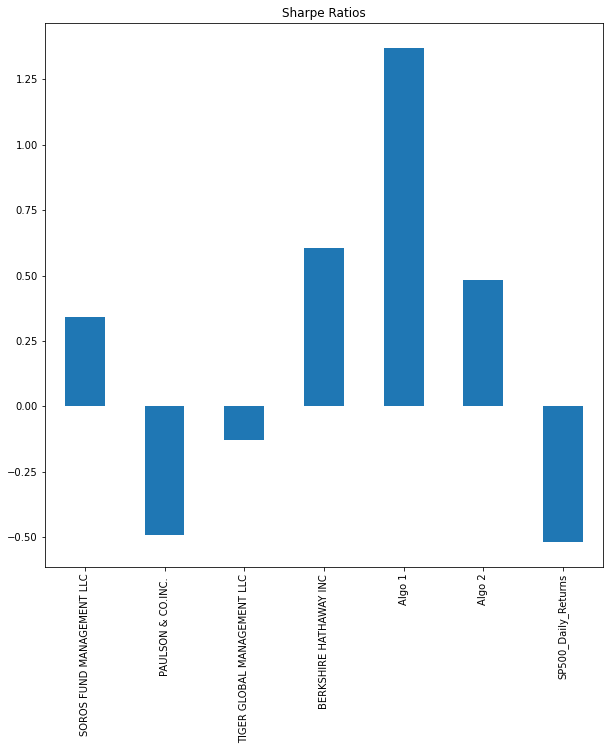

In [31]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(10,10))


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

- Algo1 outperformed both the market and the whales' portfolios. Algo2 outperformed the market and all portfolios except for Berkshire Hathaway Inc.)

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Reading data from 1st stock
aapl_history_path = Path("Resources/aapl_historical.csv")
aapl_history = pd.read_csv(aapl_history_path,index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_history = aapl_history.rename(columns={
    "Symbol": "Symbol",
    "NOCP": "AAPL",
})

aapl_history.head()

,Symbol,AAPL
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [33]:
# Reading data from 2nd stock
goog_history_path = Path("Resources/goog_historical.csv")
goog_history = pd.read_csv(goog_history_path,index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_history = goog_history.rename(columns={
    "Symbol": "Symbol",
    "NOCP": "GOOG",
})
goog_history.head()

,Symbol,GOOG
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [34]:
# Reading data from 3rd stock
cost_history_path = Path("Resources/cost_historical.csv")
cost_history = pd.read_csv(cost_history_path,index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_history = cost_history.rename(columns={
    "Symbol": "Symbol",
    "NOCP": "COST",
})
cost_history.head()

,Symbol,COST
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [35]:
# Combine all stocks in a single DataFrame
joined_history = pd.concat([aapl_history, goog_history, cost_history], axis="columns", join="inner")
joined_history.head()

,Symbol,AAPL,Symbol,GOOG,Symbol,COST
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62


In [36]:
# Reset Date index


In [37]:
# Reorganize portfolio data by having a column per symbol
joined_history = joined_history.drop(columns=["Symbol"])
joined_history.head()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62


In [38]:
# Calculate daily returns
joined_returns = joined_history.pct_change().dropna()
joined_returns
# Drop NAs

# Display sample data


,AAPL,GOOG,COST
Trade DATE,,,
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
2019-05-02,-0.012279,-0.019226,-0.007890
...,...,...,...
2018-05-17,0.003650,0.011469,0.003217
2018-05-16,0.006364,0.002948,-0.004459
2018-05-15,-0.009246,-0.002348,-0.016255


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

joined_returns = joined_returns.dot(weights)
joined_returns.head()
# Display sample data


Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame
joined_daily_returns["Custom"] = joined_returns

In [41]:
joined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_daily_returns.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns,Custom
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.006112
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000326
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.009149
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001541


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
annualized_std = joined_daily_returns.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500_Daily_Returns            0.136313
Custom                         0.213137
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date'>

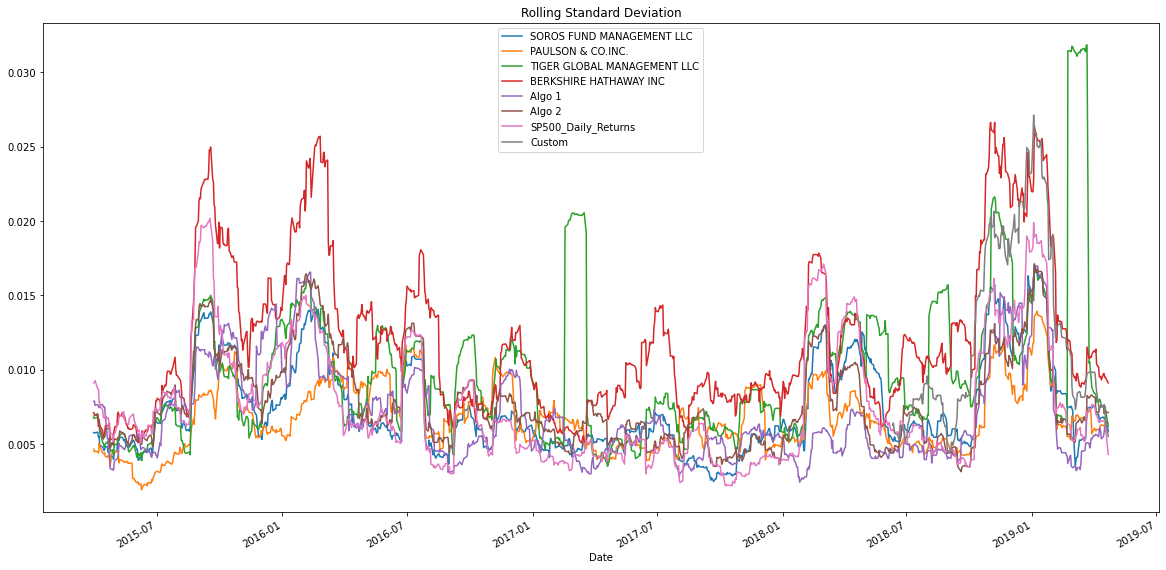

In [44]:
# Calculate rolling standard deviation
# Plot rolling standard deviation

joined_daily_returns.rolling(window=21).std().plot(figsize=(20,10), title="Rolling Standard Deviation")


### Calculate and plot the correlation

<AxesSubplot:>

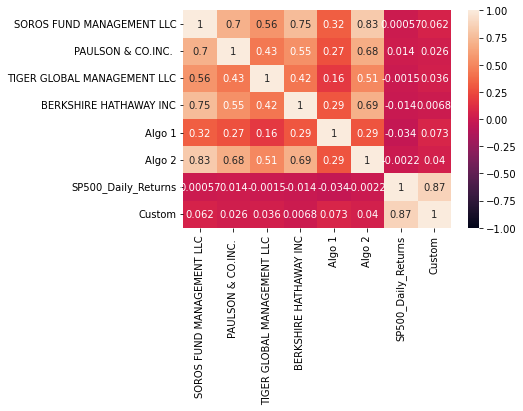

In [45]:
# Calculate and plot the correlation
correlation = joined_daily_returns.corr()

# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Portfolio'}, xlabel='Date'>

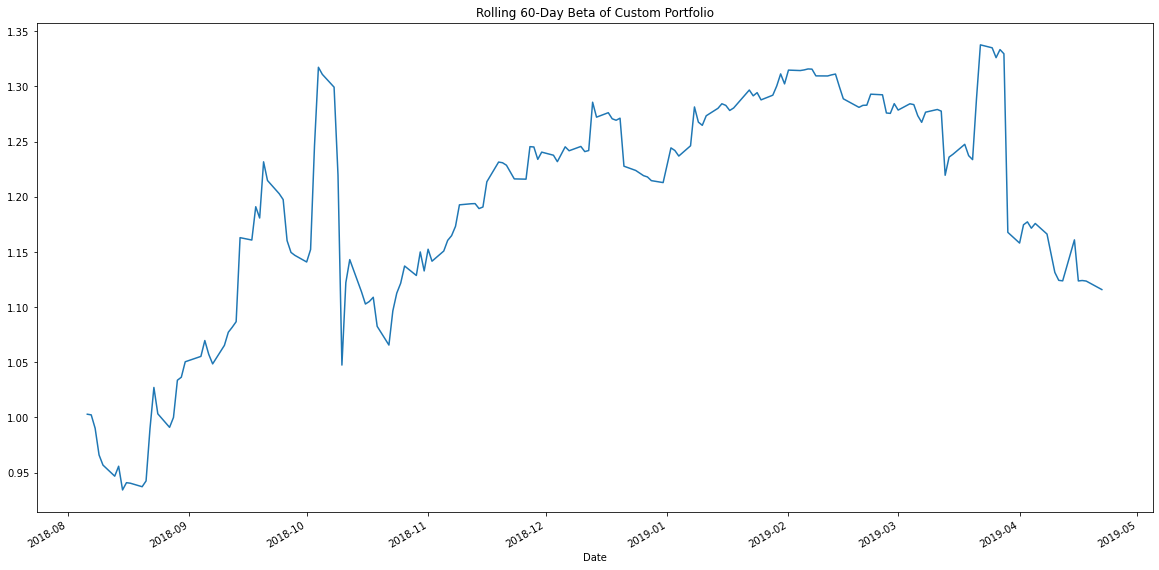

In [46]:
# Calculate and plot Beta
rolling_covariance = joined_daily_returns["Custom"].rolling(window=60).cov(joined_daily_returns["SP500_Daily_Returns"])
rolling_variance = joined_daily_returns["SP500_Daily_Returns"].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta of Custom Portfolio")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios

annual_sharpe_ratios = ((joined_daily_returns.mean()-0) * 252) / (joined_daily_returns.std() * np.sqrt(252))
annual_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500_Daily_Returns           -0.518582
Custom                        -0.613547
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

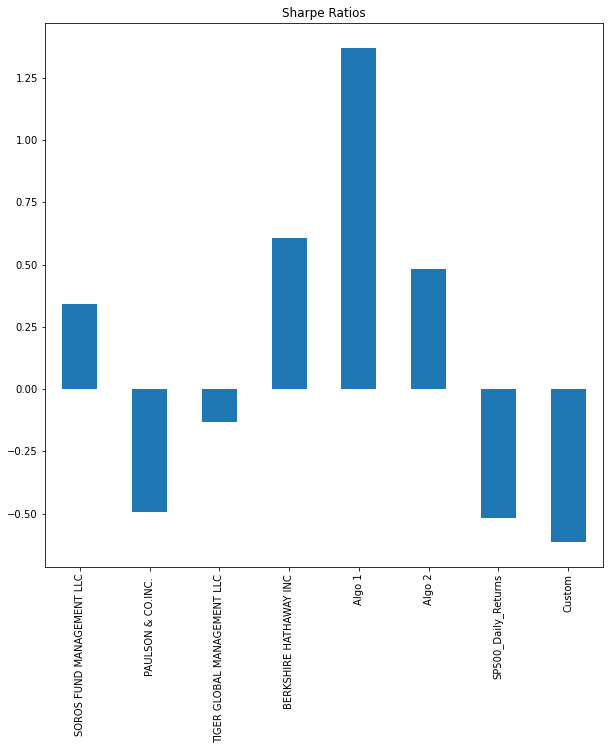

In [48]:
# Visualize the sharpe ratios as a bar plot

annual_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(10,10))

### How does your portfolio do?

Write your answer here!

- My portfolio did not perform well. It was the worst performing portfolio, as well as the riskiest, out of those analyzed. 